In [1]:
# Importar los modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Cargar el dataset
url="https://raw.githubusercontent.com/JulietaNova/08MBID---Visualizacion-de-Datos/main/Trabajo%20Pr%C3%A1ctico/hotel_bookings.csv"
s=requests.get(url).content
reservaciones=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
reservaciones

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Informacion del dataset
reservaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
reservaciones.adults.unique()
reservaciones.meal.unique()
reservaciones.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

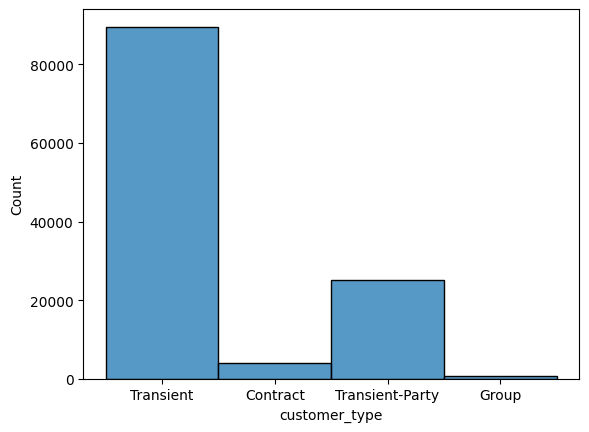

In [ ]:
sns.histplot(reservaciones.customer_type.dropna()) #dropna; no tiene encuenta los valores nulos, kde; suaviza la linea
plt.show()

<Axes: xlabel='customer_type', ylabel='count'>

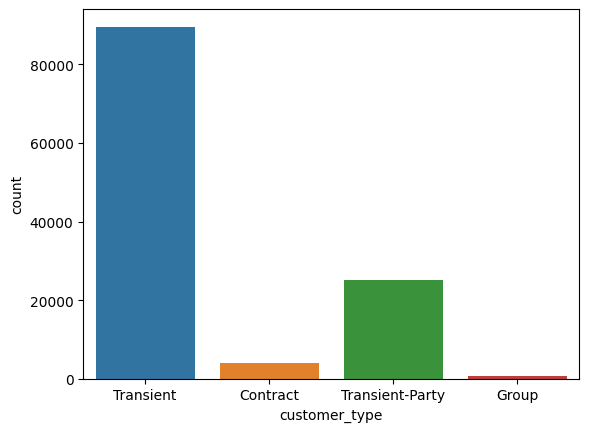

In [ ]:
sns.countplot(x="customer_type", data=reservaciones)

In [9]:
cancelaciones = reservaciones.query("hotel == 'Resort Hotel'").groupby(["country"])["is_canceled"].agg(['sum','count']).reset_index()
cancelaciones["porcentaje_cancelacion"] = (cancelaciones["sum"] / cancelaciones["count"]) * 100
cancelaciones.head(10)

,country,sum,count,porcentaje_cancelacion
0,AGO,7,24,29.166667
1,ALB,1,3,33.333333
2,AND,3,5,60.000000
3,ARE,8,11,72.727273
4,ARG,9,57,15.789474
5,ARM,0,2,0.000000
6,AUS,15,87,17.241379
7,AUT,34,210,16.190476
8,AZE,1,3,33.333333
9,BDI,0,1,0.000000


In [10]:
fig = px.choropleth(cancelaciones, locations="country",
                    color="porcentaje_cancelacion",
                    hover_name="country",
                    color_continuous_scale='Viridis')
fig.show()
#px.colors.sequential.Plasma

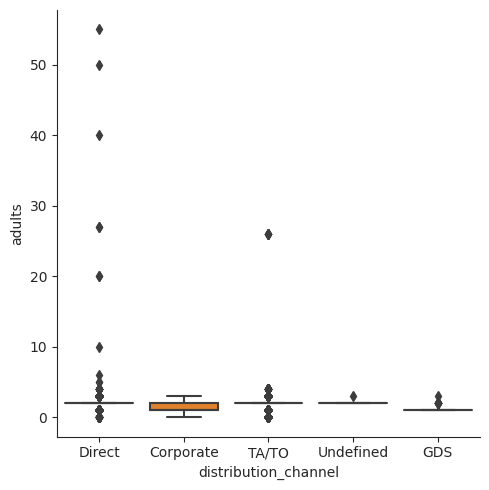

In [ ]:
with sns.axes_style(style='ticks'):
  ax = sns.catplot(data=reservaciones, x="distribution_channel", y="adults", kind="box")

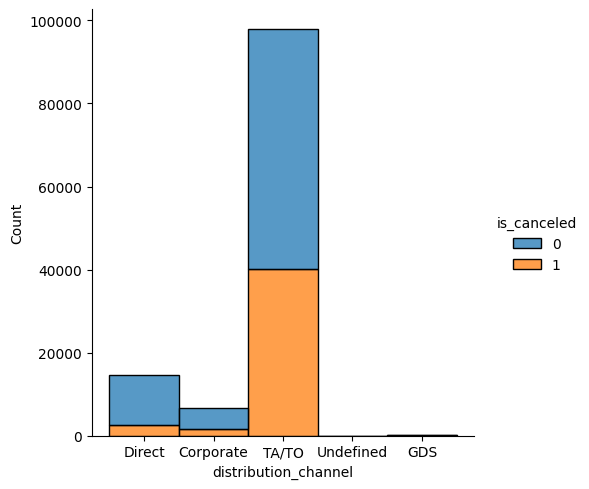

In [ ]:
sns.displot(reservaciones, x="distribution_channel", hue="is_canceled", multiple="stack")